In [1]:
import copy
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm 

from sklearn.utils import shuffle
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
from sklearn.model_selection import train_test_split

from river import metrics, evaluate, stream, compose, drift, preprocessing 

from collections import defaultdict, Counter

from AdaptiveSAM import AdaptiveSAMKNNClassifier
from SAMKNN import SAMKNNClassifier
from AdaptiveSAMPlot import AdaptiveSAMKNNClassifierPlot

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT-DDoS.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

model_bot_ddos = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=True, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model_bot_ddos, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      99.41%   94.93%   97.12%      9894  
       1      98.76%   99.86%   99.31%     40105  
                                                  
   Macro      99.08%   97.39%   98.21%            
   Micro      98.88%   98.88%   98.88%            
Weighted      98.89%   98.88%   98.87%            

                 98.88% accuracy                   – 00:00:08 – 63.07 KB
[70,703]            Precision   Recall   F1       Support  
                                                  
       0      99.48%   94.80%   97.09%     13859  
       1      98.75%   99.88%   99.31%     56843  
                                                  
   Macro      99.11%   97.34%   98.20%            
   Micro      98.88%   98.88%   98.88%            
Weighted      98.89%   98.88%   98.87%            

                 98.88% accuracy                   – 00:00:13 – 64.64 KB


           Precision   Recall   F1       Support  
                                                  
       0      99.48%   94.80%   97.09%     13859  
       1      98.75%   99.88%   99.31%     56843  
                                                  
   Macro      99.11%   97.34%   98.20%            
   Micro      98.88%   98.88%   98.88%            
Weighted      98.89%   98.88%   98.87%            

                 98.88% accuracy                  

In [3]:
# save
with open('model_bot_ddos_con.pkl', 'wb') as f:
    pickle.dump(model_bot_ddos, f)

In [4]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT-DoS.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

model_bot_dos = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=True, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model_bot_dos, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      99.62%   94.73%   97.11%      9881  
       1      98.72%   99.91%   99.31%     40118  
                                                  
   Macro      99.17%   97.32%   98.21%            
   Micro      98.89%   98.89%   98.89%            
Weighted      98.89%   98.89%   98.88%            

                 98.89% accuracy                   – 00:00:09 – 63.07 KB
[70,692]            Precision   Recall   F1       Support  
                                                  
       0      99.58%   94.80%   97.13%     13859  
       1      98.75%   99.90%   99.32%     56832  
                                                  
   Macro      99.16%   97.35%   98.23%            
   Micro      98.90%   98.90%   98.90%            
Weighted      98.91%   98.90%   98.89%            

                 98.90% accuracy                   – 00:00:13 – 64.62 KB


           Precision   Recall   F1       Support  
                                                  
       0      99.58%   94.80%   97.13%     13859  
       1      98.75%   99.90%   99.32%     56832  
                                                  
   Macro      99.16%   97.35%   98.23%            
   Micro      98.90%   98.90%   98.90%            
Weighted      98.91%   98.90%   98.89%            

                 98.90% accuracy                  

In [5]:
# save
with open('model_bot_dos_con.pkl', 'wb') as f:
    pickle.dump(model_bot_dos, f)

In [6]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT-Recon.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

model_bot_recon = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=True, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model_bot_recon, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      72.91%   30.90%   43.40%      1437  
       1      97.99%   99.66%   98.82%     48562  
                                                  
   Macro      85.45%   65.28%   71.11%            
   Micro      97.68%   97.68%   97.68%            
Weighted      97.27%   97.68%   97.23%            

                 97.68% accuracy                   – 00:00:08 – 63.09 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      74.24%   30.83%   43.57%      2861  
       1      98.00%   99.68%   98.83%     97138  
                                                  
   Macro      86.12%   65.26%   71.20%            
   Micro      97.71%   97.71%   97.71%            
Weighted      97.32%   97.71%   97.25%            

                 97.71% accuracy                   – 00:00:18 – 63.09 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      74.32%   32.69%   45.41%     13859  
       1      98.05%   99.67%   98.85%    470654  
                                                  
   Macro      86.18%   66.18%   72.13%            
   Micro      97.75%   97.75%   97.75%            
Weighted      97.37%   97.75%   97.32%            

                 97.75% accuracy                  

In [7]:
# save
with open('model_bot_recon_con.pkl', 'wb') as f:
    pickle.dump(model_bot_recon, f)

In [8]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT-Theft.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

model_bot_theft = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=True, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model_bot_theft, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      98.96%   99.25%   99.11%      4417  
       1      94.20%   92.10%   93.14%       582  
                                                  
   Macro      96.58%   95.67%   96.12%            
   Micro      98.42%   98.42%   98.42%            
Weighted      98.41%   98.42%   98.41%            

                 98.42% accuracy                   – 00:00:00 – 57.27 KB
[10,000]            Precision   Recall   F1       Support  
                                                  
       0      98.97%   99.39%   99.18%      8803  
       1      95.34%   92.39%   93.84%      1196  
                                                  
   Macro      97.16%   95.89%   96.51%            
   Micro      98.55%   98.55%   98.55%            
Weighted      98.54%   98.55%   98.54%            

                 98.55% accuracy                   – 00:00:01 – 60.08 KB
[15,000]           

           Precision   Recall   F1       Support  
                                                  
       0      99.12%   99.37%   99.25%     13858  
       1      95.36%   93.61%   94.48%      1909  
                                                  
   Macro      97.24%   96.49%   96.86%            
   Micro      98.67%   98.67%   98.67%            
Weighted      98.67%   98.67%   98.67%            

                 98.67% accuracy                  

In [9]:
# save
with open('model_bot_theft_con.pkl', 'wb') as f:
    pickle.dump(model_bot_theft, f)

### Performance of NF BoT IoT dataset

#### Without LTM

In [10]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

model= compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=False, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model, report, print_every=100000, show_time=True, show_memory=True)

[100,000]            Precision   Recall   F1       Support  
                                                  
       0      73.31%   27.45%   39.95%      2251  
       1      98.35%   99.77%   99.06%     97748  
                                                  
   Macro      85.83%   63.61%   69.50%            
   Micro      98.14%   98.14%   98.14%            
Weighted      97.79%   98.14%   97.73%            

                 98.14% accuracy                   – 00:00:17 – 72.52 KB
[200,000]            Precision   Recall   F1       Support  
                                                  
       0      73.38%   27.83%   40.36%      4556  
       1      98.34%   99.76%   99.05%    195443  
                                                  
   Macro      85.86%   63.80%   69.70%            
   Micro      98.13%   98.13%   98.13%            
Weighted      97.77%   98.13%   97.71%            

                 98.13% accuracy                   – 00:00:35 – 74.06 KB
[300,000]       

           Precision   Recall   F1       Support  
                                                  
       0      72.21%   28.09%   40.45%     13859  
       1      98.32%   99.74%   99.03%    586240  
                                                  
   Macro      85.27%   63.92%   69.74%            
   Micro      98.09%   98.09%   98.09%            
Weighted      97.72%   98.09%   97.68%            

                 98.09% accuracy                  

#### With LTM

In [11]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

model_bot_con = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=True, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model_bot_con, report, print_every=100000, show_time=True, show_memory=True)

[100,000]            Precision   Recall   F1       Support  
                                                  
       0      73.31%   27.45%   39.95%      2251  
       1      98.35%   99.77%   99.06%     97748  
                                                  
   Macro      85.83%   63.61%   69.50%            
   Micro      98.14%   98.14%   98.14%            
Weighted      97.79%   98.14%   97.73%            

                 98.14% accuracy                   – 00:00:17 – 63.09 KB
[200,000]            Precision   Recall   F1       Support  
                                                  
       0      73.38%   27.83%   40.36%      4556  
       1      98.34%   99.76%   99.05%    195443  
                                                  
   Macro      85.86%   63.80%   69.70%            
   Micro      98.13%   98.13%   98.13%            
Weighted      97.77%   98.13%   97.71%            

                 98.13% accuracy                   – 00:00:36 – 64.64 KB
[300,000]       

           Precision   Recall   F1       Support  
                                                  
       0      72.21%   28.09%   40.45%     13859  
       1      98.32%   99.74%   99.03%    586240  
                                                  
   Macro      85.27%   63.92%   69.74%            
   Micro      98.09%   98.09%   98.09%            
Weighted      97.72%   98.09%   97.68%            

                 98.09% accuracy                  

### Saving the Model

In [12]:
# save
with open('model_bot_con.pkl', 'wb') as f:
    pickle.dump(model_bot_con, f)

# Zero-Day Attack Detection

In [13]:
# load 
with open('model_bot_con.pkl', 'rb') as f:
    model_bot_con = pickle.load(f)

#### Testing the DDoS model on BoT DDoS Zero Day Attack

In [14]:
# load 
with open('model_bot_ddos_con.pkl', 'rb') as f:
    model_bot_ddos = pickle.load(f)

In [15]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-BoT-IoT-DDoS.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)

# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_bot_ddos.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for Zero NF-BoT DDoS samples")
print("Classification Report:", Report)

Printing the results for Zero NF-BoT DDoS samples
Classification Report:            Precision   Recall   F1       Support  
                                                  
       0      99.54%   95.32%   97.38%     13859  
       1      98.89%   99.89%   99.39%     57844  
                                                  
   Macro      99.21%   97.61%   98.39%            
   Micro      99.01%   99.01%   99.01%            
Weighted      99.02%   99.01%   99.00%            

                 99.01% accuracy                  


#### Testing the BoT model on BoT DDoS Zero Day Attack

In [16]:
from river.metrics import ClassificationReport

# # Load datasets
data = pd.read_csv("Augmented_NF-BoT-IoT-DDoS.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)

# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_bot_con.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-BoT DDoS samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-BoT DDoS samples
Classification Report:            Precision   Recall    F1       Support  
                                                   
       0     100.00%    31.72%   48.16%     13859  
       1      85.94%   100.00%   92.44%     57844  
                                                   
   Macro      92.97%    65.86%   70.30%            
   Micro      86.80%    86.80%   86.80%            
Weighted      88.66%    86.80%   83.88%            

                  86.80% accuracy                  


### Testing the DoS model on BoT DoS Zero Day Attack

In [17]:
# load 
with open('model_bot_dos_con.pkl', 'rb') as f:
    model_bot_dos = pickle.load(f)

In [18]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-BoT-IoT-DoS.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)


# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_bot_dos.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-BoT DoS samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-BoT DoS samples
Classification Report:            Precision   Recall   F1       Support  
                                                  
       0      99.62%   93.58%   96.50%     13859  
       1      98.48%   99.91%   99.19%     57833  
                                                  
   Macro      99.05%   96.75%   97.85%            
   Micro      98.69%   98.69%   98.69%            
Weighted      98.70%   98.69%   98.67%            

                 98.69% accuracy                  


### Testing the BoT model on BoT DoS Zero Day Attack

In [19]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-BoT-IoT-DoS.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)


# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_bot_con.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-BoT DoS samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-BoT DoS samples
Classification Report:            Precision   Recall    F1       Support  
                                                   
       0     100.00%    31.72%   48.16%     13859  
       1      85.94%   100.00%   92.44%     57833  
                                                   
   Macro      92.97%    65.86%   70.30%            
   Micro      86.80%    86.80%   86.80%            
Weighted      88.66%    86.80%   83.88%            

                  86.80% accuracy                  


#### Testing the Reconnaissance model on BoT Reconnaissance Zero Day Attack

In [20]:
# load 
with open('model_bot_recon_con.pkl', 'rb') as f:
    model_bot_recon = pickle.load(f)

In [21]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-BoT-IoT-Recon.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)


# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_bot_recon.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-BoT Reconnaissance samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-BoT Reconnaissance samples
Classification Report:            Precision   Recall   F1       Support  
                                                  
       0      96.78%   39.97%   56.57%     13859  
       1      98.27%   99.96%   99.11%    471655  
                                                  
   Macro      97.53%   69.96%   77.84%            
   Micro      98.25%   98.25%   98.25%            
Weighted      98.22%   98.25%   97.89%            

                 98.25% accuracy                  


#### Testing the BoT model on BoT Reconnaissance Zero Day Attack

In [22]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-BoT-IoT-Recon.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)


# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_bot_con.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-BoT Reconnaissance samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-BoT Reconnaissance samples
Classification Report:            Precision   Recall   F1       Support  
                                                  
       0      98.21%   31.72%   47.95%     13859  
       1      98.03%   99.98%   99.00%    471655  
                                                  
   Macro      98.12%   65.85%   73.48%            
   Micro      98.03%   98.03%   98.03%            
Weighted      98.04%   98.03%   97.54%            

                 98.03% accuracy                  


### Testing the Theft model on BoT Theft Zero Day Attack

In [23]:
# load 
with open('model_bot_theft_con.pkl', 'rb') as f:
    model_bot_theft = pickle.load(f)

In [24]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-BoT-IoT-Theft.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)


# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_bot_theft.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-BoT Theft samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-BoT Theft samples
Classification Report:            Precision   Recall   F1       Support  
                                                  
       0      97.21%   99.24%   98.21%     13859  
       1      95.99%   86.42%   90.96%      2909  
                                                  
   Macro      96.60%   92.83%   94.58%            
   Micro      97.02%   97.02%   97.02%            
Weighted      97.00%   97.02%   96.96%            

                 97.02% accuracy                  


### Testing the BoT model on BoT Theft Zero Day Attack

In [25]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-BoT-IoT-Theft.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)


# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_bot_con.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-BoT Theft samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-BoT Theft samples
Classification Report:            Precision   Recall    F1       Support  
                                                   
       0     100.00%    31.72%   48.16%     13859  
       1      23.51%   100.00%   38.07%      2909  
                                                   
   Macro      61.76%    65.86%   43.12%            
   Micro      43.57%    43.57%   43.57%            
Weighted      86.73%    43.57%   46.41%            

                  43.57% accuracy                  


# Performance of SAMKNN 

### SAMKNN with LTM

In [26]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

SAMKNN_model = compose.Pipeline(
    preprocessing.StandardScaler(),
    SAMKNNClassifier(ltm_size=0.4, max_window_size=300, min_stm_size=30, n_neighbors=5, stm_size_option='maxACCApprox', use_ltm=True, weighting='distance')
)
#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

evaluate.progressive_val_score(dataset, SAMKNN_model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      53.53%    8.21%   14.24%      1108  
       1      97.96%   99.84%   98.89%     48892  
                                                  
   Macro      75.74%   54.03%   56.57%            
   Micro      97.81%   97.81%   97.81%            
Weighted      96.97%   97.81%   97.01%            

                 97.81% accuracy                   – 00:00:16 – 4.25 MB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      54.95%    8.88%   15.30%      2251  
       1      97.94%   99.83%   98.88%     97749  
                                                  
   Macro      76.44%   54.36%   57.09%            
   Micro      97.78%   97.78%   97.78%            
Weighted      96.97%   97.78%   97.00%            

                 97.78% accuracy                   – 00:00:34 – 6.78 MB
[150,000]          

           Precision   Recall   F1       Support  
                                                  
       0      54.84%    8.79%   15.15%     13859  
       1      97.89%   99.83%   98.85%    586241  
                                                  
   Macro      76.36%   54.31%   57.00%            
   Micro      97.73%   97.73%   97.73%            
Weighted      96.89%   97.73%   96.91%            

                 97.73% accuracy                  

### SAMKNN without LTM

In [27]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

SAMKNN_model = compose.Pipeline(
    preprocessing.StandardScaler(),
    SAMKNNClassifier(ltm_size=0.4, max_window_size=500, min_stm_size=30, n_neighbors=5, stm_size_option='maxACCApprox', use_ltm=False, weighting='distance')
)
#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

evaluate.progressive_val_score(dataset, SAMKNN_model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      48.94%    8.30%   14.20%      1108  
       1      97.96%   99.80%   98.87%     48892  
                                                  
   Macro      73.45%   54.05%   56.54%            
   Micro      97.78%   97.78%   97.78%            
Weighted      96.87%   97.78%   97.00%            

                 97.78% accuracy                   – 00:00:06 – 4.71 MB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      51.16%    9.77%   16.41%      2251  
       1      97.96%   99.79%   98.86%     97749  
                                                  
   Macro      74.56%   54.78%   57.64%            
   Micro      97.76%   97.76%   97.76%            
Weighted      96.91%   97.76%   97.01%            

                 97.76% accuracy                   – 00:00:12 – 5.42 MB
[150,000]          

           Precision   Recall   F1       Support  
                                                  
       0      51.51%    9.70%   16.33%     13859  
       1      97.91%   99.78%   98.84%    586241  
                                                  
   Macro      74.71%   54.74%   57.58%            
   Micro      97.70%   97.70%   97.70%            
Weighted      96.83%   97.70%   96.93%            

                 97.70% accuracy                  

### Statistical Testing

In [30]:
import pandas as pd
from sklearn.utils import shuffle
from river import stream, compose, preprocessing, metrics
import numpy as np
from scipy import stats
from tqdm import tqdm  # Ensure tqdm is imported

# Load and Prepare Data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Sample the data for faster testing 
sample_size = 100000  
if len(data) > sample_size:
    data = data.sample(n=sample_size, random_state=42)
    print(f"Data sampled to {sample_size} instances for faster processing.")

X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']

# **Option 1:** Keep labels as integers
# Ensure that labels are integers
y = y.astype(int)

# Check class distribution
class_counts = y.value_counts()
print("Class Distribution:")
print(class_counts)

# Parameters for Evaluation
n_runs = 5  # Number of independent evaluation runs
random_states = np.random.randint(0, 10000, size=n_runs)

# Containers to Store Performance Metrics
accuracy_adaptive = []
accuracy_samknn = []

# Define Classifiers
def get_models():
    model_adaptive = compose.Pipeline(
        preprocessing.StandardScaler(),
        ('classifier', AdaptiveSAMKNNClassifier(
            max_window_size=300,  
            ltm_size=0.4,
            use_ltm=True,
            max_ltm_size_threshold=0.30
        ))
    )
    
    model_samknn = compose.Pipeline(
        preprocessing.StandardScaler(),
        ('classifier', SAMKNNClassifier(
            ltm_size=0.4, 
            max_window_size=300, 
            min_stm_size=30, 
            n_neighbors=5, 
            stm_size_option='maxACCApprox', 
            use_ltm=True
        ))
    )
    
    return model_adaptive, model_samknn

# Evaluation Loop with Optimizations
for i in tqdm(range(n_runs), desc="Runs"):
    print(f"\nRun {i+1}/{n_runs}")
    
    # Shuffle Data with a Unique Random State
    X_shuffled, y_shuffled = shuffle(X, y, random_state=random_states[i])
    dataset = stream.iter_pandas(X_shuffled, y_shuffled)
    
    # Initialize Models
    model_adaptive, model_samknn = get_models()
    
    # Initialize Metrics
    metric_adaptive = metrics.Accuracy()
    metric_samknn = metrics.Accuracy()
    
    # Evaluate both classifiers in a single pass
    for xi, yi_label in dataset:
        # 'xi' is already a dictionary; no need to convert
        
        # AdaptiveSAMKNNClassifier
        y_pred_adaptive = model_adaptive.predict_one(xi)
        model_adaptive.learn_one(xi, yi_label)
        metric_adaptive.update(yi_label, y_pred_adaptive)
        
        # SAMKNNClassifier
        y_pred_knn = model_samknn.predict_one(xi)
        model_samknn.learn_one(xi, yi_label)
        metric_samknn.update(yi_label, y_pred_knn)
        
    # Collect Metrics for the Current Run
    fold_accuracy_adaptive = metric_adaptive.get()
    fold_accuracy_samknn = metric_samknn.get()  # Corrected line
    
    accuracy_adaptive.append(fold_accuracy_adaptive)
    accuracy_samknn.append(fold_accuracy_samknn)
    
    # Display Metrics for the Current Run
    print(f"AdaptiveSAMKNNClassifier Accuracy: {fold_accuracy_adaptive:.4f}")
    print(f"SAMKNNClassifier Accuracy: {fold_accuracy_samknn:.4f}")

# Statistical Testing

# Convert lists to NumPy arrays for easier manipulation
accuracy_adaptive = np.array(accuracy_adaptive)
accuracy_samknn = np.array(accuracy_samknn)

# Calculate Mean and Standard Deviation
mean_adaptive = accuracy_adaptive.mean()
std_adaptive = accuracy_adaptive.std(ddof=1)
mean_samknn = accuracy_samknn.mean()
std_samknn = accuracy_samknn.std(ddof=1)

# Calculate 95% Confidence Intervals
conf_int_adaptive = stats.t.interval(
    0.95, 
    len(accuracy_adaptive)-1, 
    loc=mean_adaptive, 
    scale=std_adaptive/np.sqrt(n_runs)
)

conf_int_samknn = stats.t.interval(
    0.95, 
    len(accuracy_samknn)-1, 
    loc=mean_samknn, 
    scale=std_samknn/np.sqrt(n_runs)
)

# Perform Paired t-test
t_stat, p_value = stats.ttest_rel(accuracy_adaptive, accuracy_samknn)

# Step 6: Display Results
print("\n=== Performance Metrics ===")
print(f"AdaptiveSAMKNNClassifier Accuracy: {accuracy_adaptive}")
print(f"Mean Accuracy: {mean_adaptive:.4f}")
print(f"Standard Deviation: {std_adaptive:.4f}")
print(f"95% Confidence Interval: ({conf_int_adaptive[0]:.4f}, {conf_int_adaptive[1]:.4f})\n")

print(f"SAMKNNClassifier Accuracy: {accuracy_samknn}")
print(f"Mean Accuracy: {mean_samknn:.4f}")
print(f"Standard Deviation: {std_samknn:.4f}")
print(f"95% Confidence Interval: ({conf_int_samknn[0]:.4f}, {conf_int_samknn[1]:.4f})\n")

print("=== Statistical Test ===")
print(f"Paired t-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Result: The difference in accuracy is statistically significant.")
else:
    print("Result: The difference in accuracy is not statistically significant.")

Data sampled to 100000 instances for faster processing.
Class Distribution:
Label
1    97749
0     2251
Name: count, dtype: int64


Runs:   0%|                                               | 0/5 [00:00<?, ?it/s]


Run 1/5


Runs:  20%|███████▊                               | 1/5 [00:48<03:12, 48.04s/it]

AdaptiveSAMKNNClassifier Accuracy: 0.9813
SAMKNNClassifier Accuracy: 0.9779

Run 2/5


Runs:  40%|███████████████▌                       | 2/5 [01:36<02:25, 48.51s/it]

AdaptiveSAMKNNClassifier Accuracy: 0.9818
SAMKNNClassifier Accuracy: 0.9781

Run 3/5


Runs:  60%|███████████████████████▍               | 3/5 [02:24<01:36, 48.12s/it]

AdaptiveSAMKNNClassifier Accuracy: 0.9816
SAMKNNClassifier Accuracy: 0.9776

Run 4/5


Runs:  80%|███████████████████████████████▏       | 4/5 [03:14<00:48, 48.79s/it]

AdaptiveSAMKNNClassifier Accuracy: 0.9814
SAMKNNClassifier Accuracy: 0.9775

Run 5/5


Runs: 100%|███████████████████████████████████████| 5/5 [04:03<00:00, 48.63s/it]

AdaptiveSAMKNNClassifier Accuracy: 0.9816
SAMKNNClassifier Accuracy: 0.9778

=== Performance Metrics ===
AdaptiveSAMKNNClassifier Accuracy: [0.98132 0.98177 0.98158 0.98139 0.98158]
Mean Accuracy: 0.9815
Standard Deviation: 0.0002
95% Confidence Interval: (0.9813, 0.9817)

SAMKNNClassifier Accuracy: [0.97789 0.97806 0.97764 0.97749 0.97777]
Mean Accuracy: 0.9778
Standard Deviation: 0.0002
95% Confidence Interval: (0.9775, 0.9780)

=== Statistical Test ===
Paired t-test: t-statistic = 41.2643, p-value = 0.0000
Result: The difference in accuracy is statistically significant.


### Visualising the Performance of BoT IoT datset

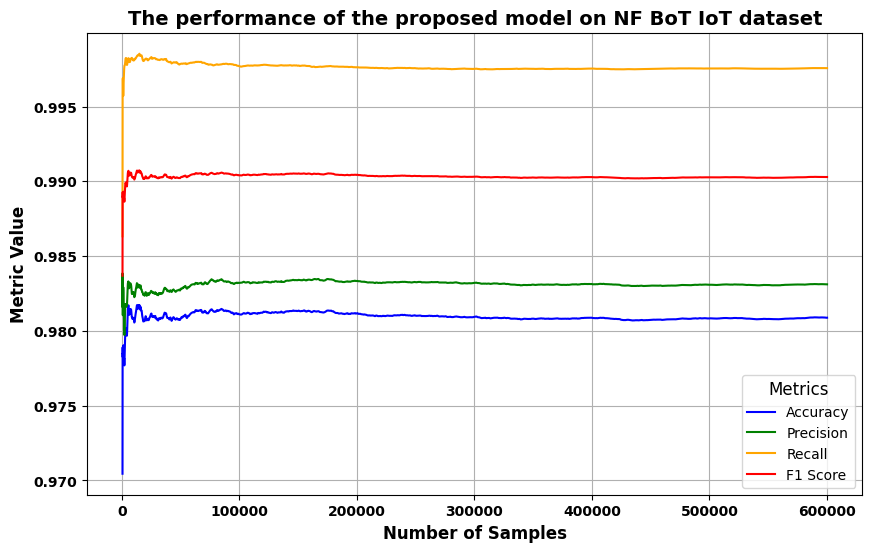

In [29]:
import matplotlib.pyplot as plt
from collections import deque
import numpy as np
from river import metrics, stream, compose, preprocessing
from sklearn.utils import shuffle
import pandas as pd

# Load dataset
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Prepare features and target
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)

# Initialize rolling window size
window_size = 500

# Initialize rolling metrics storage
rolling_acc = deque(maxlen=window_size)
rolling_pre = deque(maxlen=window_size)
rolling_rec = deque(maxlen=window_size)
rolling_f1 = deque(maxlen=window_size)

# Initialize lists for storing the cumulative metrics for plotting
acc_values = []
pre_values = []
rec_values = []
f1_values = []
window_indices = []

# Model setup
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=True, max_ltm_size_threshold=0.30))
)

# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Shuffle dataset
X, y = shuffle(X, y, random_state=42)

# Iterate over the test stream and update metrics
for idx, (xi, yi) in enumerate(stream.iter_pandas(X, y)):
    y_pred = model.predict_one(xi)
    model.learn_one(xi, yi)
    
    # Update metrics for the current sample
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)
    
    # Update rolling metrics
    rolling_acc.append(Acc.get())
    rolling_pre.append(Pre.get())
    rolling_rec.append(Rec.get())
    rolling_f1.append(F1.get())
    
    # After every 500 samples, store the average of the rolling window
    if len(rolling_acc) == window_size:
        acc_values.append(np.mean(rolling_acc))
        pre_values.append(np.mean(rolling_pre))
        rec_values.append(np.mean(rolling_rec))
        f1_values.append(np.mean(rolling_f1))
        window_indices.append(idx)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(window_indices, acc_values, label='Accuracy', color='blue')
plt.plot(window_indices, pre_values, label='Precision', color='green')
plt.plot(window_indices, rec_values, label='Recall', color='orange')
plt.plot(window_indices, f1_values, label='F1 Score', color='red')

# Make the title and labels bold
plt.xlabel('Number of Samples', fontsize=12, fontweight='bold')
plt.ylabel('Metric Value', fontsize=12, fontweight='bold')
plt.title('The performance of the proposed model on NF BoT IoT dataset', fontsize=14, fontweight='bold')

# Make the legend bold
plt.legend(fontsize=10, title_fontsize='12', title='Metrics', loc='best')

# Make the ticks bold
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.grid(True)
plt.savefig('NF_BoT_Conference.png')
plt.show()